1. Many datapoint tend to have a linear shape
2. In order to determine which value for parameters m and c provide the best fitting line we start randomly and compute the prediction error given by $|\hat{y} - y|$
3. We sum all the individual errors into the Mean Square Error $\epsilon^2 = \frac{1}{n}\sum_{i}(\hat{y} - y)^2$ 
4. From this we aim at $\min_{m, c} \epsilon^2 = \min_{m, c}\frac{1}{n}\sum_{i}(mx_i + c - y_i)^2$
5. To minimise we use calculus and the Chain Rule
   -   $u_i = mx_i + c - y_i$
   -   $\frac{\partial{\epsilon^2}}{\partial c}=2\sum_{i}u_i$
   -   $\frac{\partial{\epsilon^2}}{\partial m}=\frac{1}{n}\sum_{i}x_iu_i$
6. From this we can solve ando obtain that $m = \frac{(x_i-\bar{x})(y_i-\bar{y})}{(x_i-\bar{x})^2}$. I haven't really understood why my professor uses〈...〉. In general it would help me out to understand what this formula entails and why it can also be written as $\frac{Cov(x,y)}{Var(x)}$
7. From this we also get $c = \bar{y} - m \bar{x}$
8. We can apply this similar approach to a regression with multiple dimensions
9. Then he mentions we need to regularise, I haven't quite understood what this means or why we do it
10. Finally, we can also plot the $\min_{m, c} \epsilon^2 = \min_{m, c}\frac{1}{n}\sum_{i}(mx_i + c - y_i)^2$ as a **countour plot**. This enables us to reflect that sometimes we do not have an analytic solution, but we need approximation methods. We use the gradient flow. This part is a little unclear still, I would like to have a comparison example between a straight forward analytic solution VS a more complex solution.
11. From my understanding, gradient descent consists in the continuous update of parameters c and m by subtracting an amount that comes from a vector computed via the derivative. This part ist still confusing for me: what is ∇E? Why we subtract it instead of adding it, in other words why it points upwards?
12. I also want to understand what is the difference between the Numerical gradient descent method VS the derivative using autograd

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [28]:
path = "/home/viklin/repos/ai_and_text_analytics/worksheets/04_regression_exercise/canada_per_capita_income.csv"

df = pd.read_csv(path)
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'Per capita income (US$)')

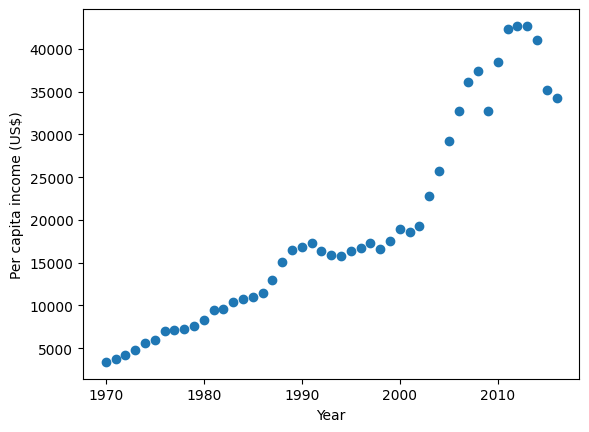

In [29]:
plt.scatter(df['year'], df['per capita income (US$)'])
plt.xlabel('Year')
plt.ylabel('Per capita income (US$)')

In [30]:
model = linear_model.LinearRegression()

model.fit(df[['year']], df['per capita income (US$)'])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
model.predict([[1975]])

/home/viklin/repos/ai_and_text_analytics/worksheets/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4007.7657094])

In [32]:
model.coef_

array([828.46507522])

This represents $m$

In [33]:
model.intercept_

np.float64(-1632210.7578554575)

This represesents $c$

## 2. Multiple Variable Regression

In [34]:
path = "/home/viklin/repos/ai_and_text_analytics/worksheets/04_regression_exercise/homeprices.csv"

df = pd.read_csv(path)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [35]:
median_bedrooms = df.bedrooms.median()

In [36]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [37]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [38]:
model = linear_model.LinearRegression()

model.fit(df[['area', 'bedrooms', 'age']], df.price)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [40]:
model.intercept_

np.float64(221323.00186540396)

In [41]:
model.predict([[3000, 3, 40]])

/home/viklin/repos/ai_and_text_analytics/worksheets/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])